In [1]:
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
# Load and preprocess the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '../../data/FracAtlas/images/',
    label_mode='binary',
    seed=123,
    validation_split=0.1,
    subset="both",
    image_size=(256, 256),
    batch_size=32,
    color_mode='grayscale'
)

Found 3996 files belonging to 2 classes.
Using 3597 files for training.
Using 399 files for validation.


In [3]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [4]:
model = tf.keras.Sequential([
    #data_augmentation,
    layers.Conv2D(64, 3, activation='relu', input_shape=(256, 256, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [5]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

callback = tf.keras.callbacks.EarlyStopping(monitor='auc', patience=3)

model.fit(dataset[0], epochs=10, class_weight={0: 4, 1: 1}, callbacks=[callback])

Epoch 1/10
113/113 [==============================] - 23s 130ms/step - loss: 6.2110 - accuracy: 0.5830 - auc: 0.6377 - precision: 0.8750 - recall: 0.5738
Epoch 2/10
113/113 [==============================] - 14s 116ms/step - loss: 0.9509 - accuracy: 0.6828 - auc: 0.7256 - precision: 0.8956 - recall: 0.6944
Epoch 3/10
113/113 [==============================] - 14s 117ms/step - loss: 0.8417 - accuracy: 0.7654 - auc: 0.7926 - precision: 0.9153 - recall: 0.7869
Epoch 4/10
113/113 [==============================] - 14s 117ms/step - loss: 0.6850 - accuracy: 0.8123 - auc: 0.8742 - precision: 0.9394 - recall: 0.8245
Epoch 5/10
113/113 [==============================] - 14s 118ms/step - loss: 0.5813 - accuracy: 0.8593 - auc: 0.9123 - precision: 0.9506 - recall: 0.8740
Epoch 6/10
113/113 [==============================] - 14s 117ms/step - loss: 0.4590 - accuracy: 0.9008 - auc: 0.9487 - precision: 0.9693 - recall: 0.9079
Epoch 7/10
113/113 [==============================] - 14s 118ms/step - loss:

In [6]:
loss, accuracy, auc, precision, recall = model.evaluate(dataset[1])
print(f'Loss: {loss}, Accuracy: {accuracy}, AUC: {auc}, Precision: {precision}, Recall: {recall}')

13/13 [==============================] - 2s 114ms/step - loss: 1.4245 - accuracy: 0.7594 - auc: 0.7149 - precision: 0.8863 - recall: 0.8104
Loss: 1.4244863986968994, Accuracy: 0.7593985199928284, AUC: 0.714853048324585, Precision: 0.8862876296043396, Recall: 0.8103975653648376


13/13 [==============================] - 1s 85ms/step
              precision    recall  f1-score   support

         0.0       0.38      0.53      0.44        72
         1.0       0.89      0.81      0.85       327

    accuracy                           0.76       399
   macro avg       0.63      0.67      0.64       399
weighted avg       0.79      0.76      0.77       399

[[ 38  34]
 [ 62 265]]
Confusion Matrix:


<Axes: >

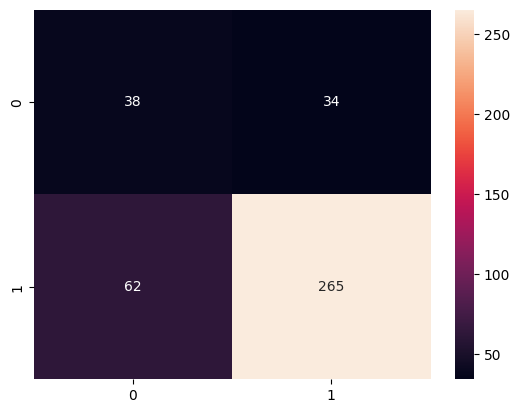

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Get the predictions on the validation data
y_pred = model.predict(dataset[1])

# Convert the predictions to binary values
y_pred_binary = (y_pred > 0.5).astype(int)

# Get the true labels from the validation data
y_true = np.concatenate([y for x, y in dataset[1]], axis=0)

# Generate the classification report
report = classification_report(y_true, y_pred_binary)
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_true, y_pred_binary)
print(matrix)

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_true,y_pred_binary),annot = True,fmt='d')

In [9]:
model2 = tf.keras.Sequential([
    #data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256, 256, 1)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

In [10]:
# Compile and train the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

callback = tf.keras.callbacks.EarlyStopping(monitor='auc', patience=3)

model2.fit(dataset[0], epochs=30, validation_data=dataset[1], class_weight={0: 4, 1: 1}, callbacks=[callback])

Epoch 1/30
113/113 [==============================] - 25s 168ms/step - loss: 6.2651 - accuracy: 0.5388 - auc: 0.6261 - precision: 0.8743 - recall: 0.5115 - val_loss: 0.6129 - val_accuracy: 0.6591 - val_auc: 0.6892 - val_precision: 0.8687 - val_recall: 0.6881
Epoch 2/30
113/113 [==============================] - 18s 149ms/step - loss: 0.9703 - accuracy: 0.6169 - auc: 0.6922 - precision: 0.8927 - recall: 0.6060 - val_loss: 0.6185 - val_accuracy: 0.7669 - val_auc: 0.7139 - val_precision: 0.8703 - val_recall: 0.8410
Epoch 3/30
113/113 [==============================] - 18s 147ms/step - loss: 0.9471 - accuracy: 0.6845 - auc: 0.7242 - precision: 0.8962 - recall: 0.6961 - val_loss: 0.5649 - val_accuracy: 0.7870 - val_auc: 0.7040 - val_precision: 0.8667 - val_recall: 0.8746
Epoch 4/30
113/113 [==============================] - 17s 148ms/step - loss: 0.8690 - accuracy: 0.7376 - auc: 0.7668 - precision: 0.9039 - recall: 0.7612 - val_loss: 0.5424 - val_accuracy: 0.8145 - val_auc: 0.7259 - val_pre

13/13 [==============================] - 1s 90ms/step
              precision    recall  f1-score   support

         0.0       0.51      0.47      0.49        72
         1.0       0.89      0.90      0.89       327

    accuracy                           0.82       399
   macro avg       0.70      0.69      0.69       399
weighted avg       0.82      0.82      0.82       399

Confusion Matrix:


<Axes: >

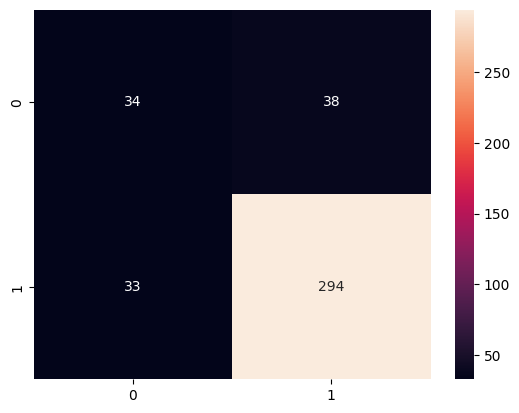

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Get the predictions on the validation data
y_pred = model2.predict(dataset[1])

# Convert the predictions to binary values
y_pred_binary = (y_pred > 0.5).astype(int)

# Get the true labels from the validation data
y_true = np.concatenate([y for x, y in dataset[1]], axis=0)

# Generate the classification report
report = classification_report(y_true, y_pred_binary)
print(report)

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_true,y_pred_binary),annot = True,fmt='d')

In [13]:
model2.save('frac_atlas_model')

INFO:tensorflow:Assets written to: frac_atlas_model\assets


INFO:tensorflow:Assets written to: frac_atlas_model\assets
